In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. scikit-learn中的svm

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target
X = X[y<2, :2]
y = y[y<2]

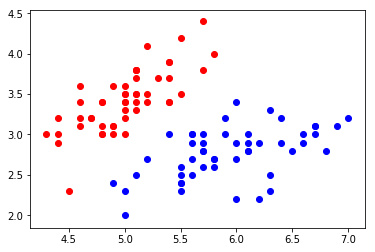

In [3]:
plt.scatter(X[y==0,0], X[y==0,1], color='red')
plt.scatter(X[y==1,0], X[y==1,1], color='blue')
plt.show()

- 最大化间隔要求必须尺度一致，所以要进行数据标准化

In [4]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
standardScaler.fit(X)
X_std = standardScaler.transform(X)

In [5]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=1e9) # C soft margin svm中正则项的系数
svc.fit(X_std,y)

LinearSVC(C=1000000000.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [6]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

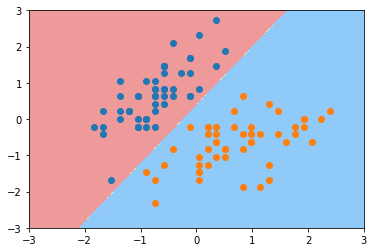

In [7]:
plot_decision_boundary(svc, axis=[-3,3,-3,3])
plt.scatter(X_std[y==0,0], X_std[y==0,1])
plt.scatter(X_std[y==1,0], X_std[y==1,1])
plt.show()

In [9]:
svc2 = LinearSVC(C=0.01)
svc2.fit(X_std, y)

LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

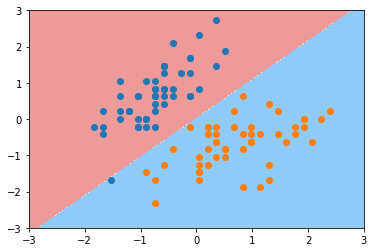

In [10]:
plot_decision_boundary(svc2, axis=[-3,3,-3,3])
plt.scatter(X_std[y==0,0], X_std[y==0,1])
plt.scatter(X_std[y==1,0], X_std[y==1,1])
plt.show()

In [11]:
svc.coef_

array([[ 4.03242537, -2.50699434]])

In [12]:
svc.intercept_

array([0.92736593])

In [15]:
def plot_svc_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    plt.contourf(x0, x1, zz, cmap=custom_cmap)
    
    w = model.coef_[0]
    b = model.intercept_[0]
    # w0 * x0 + w1 * x1 + b = 0
    # up : w0 * x0 + w1 * x1 + b = 1
    # down : w0 * x0 + w1 * x1 + b = -1
    # => x1 = -w0*x0/w1 -b/w1
    plot_x = np.linspace(axis[0], axis[1], 200)
    up_y = -w[0]/w[1] * plot_x - b/w[1] + 1/w[1]
    down_y = -w[0]/w[1] * plot_x - b/w[1] - 1/w[1]
    
    up_index = (up_y >= axis[2]) & (up_y <= axis[3])
    down_index = (down_y >= axis[2]) & (down_y < axis[3])
    plt.plot(plot_x[up_index], up_y[up_index], color='black')
    plt.plot(plot_x[down_index], down_y[down_index], color='black')

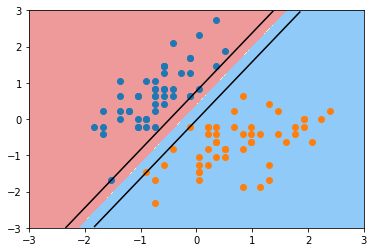

In [16]:
plot_svc_decision_boundary(svc, axis=[-3,3,-3,3])
plt.scatter(X_std[y==0,0], X_std[y==0,1])
plt.scatter(X_std[y==1,0], X_std[y==1,1])
plt.show()

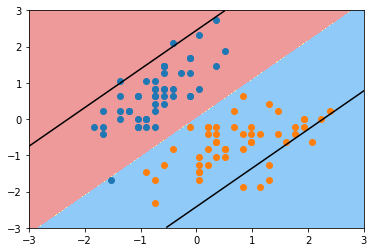

In [17]:
plot_svc_decision_boundary(svc2, axis=[-3,3,-3,3])
plt.scatter(X_std[y==0,0], X_std[y==0,1])
plt.scatter(X_std[y==1,0], X_std[y==1,1])
plt.show()

### 1.2 SVM中对于非线性数据如何分割？
- 多项式特征
- 核函数

## 2. SVM中使用多项式特征

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
X, y = datasets.make_moons()

In [19]:
X.shape

(100, 2)

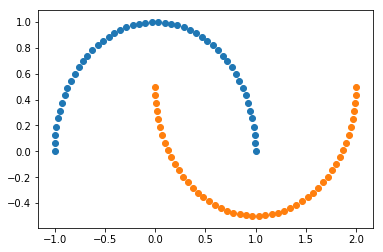

In [20]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

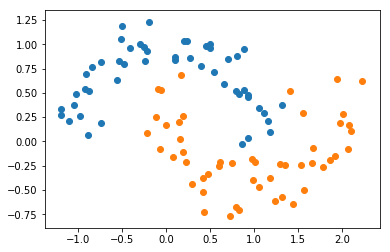

In [21]:
X, y = datasets.make_moons(noise=0.15, random_state=666)
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

In [22]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
def PolynomialSVC(degree, C=1.0):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std', StandardScaler()),
        ('linearSVC', LinearSVC(C=C))
    ])

In [25]:
poly_svc = PolynomialSVC(degree=3)

In [26]:
poly_svc.fit(X, y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('std', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linearSVC', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

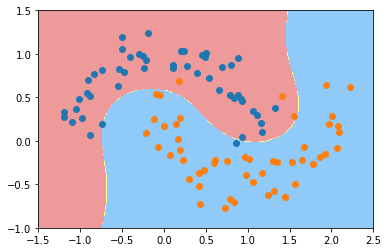

In [28]:
plot_decision_boundary(poly_svc, axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

## 2. 多项式核函数SVM

In [29]:
from sklearn.svm import SVC
def PolynomialKernelSVC(degree, C=1.0):
    return Pipeline([
        ('std', StandardScaler()),
        ('kernelSVC', SVC(kernel='poly', degree=degree, C=C))
    ])

In [30]:
poly_kernel_svc = PolynomialKernelSVC(degree=3)
poly_kernel_svc.fit(X,y)

Pipeline(memory=None,
     steps=[('std', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kernelSVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

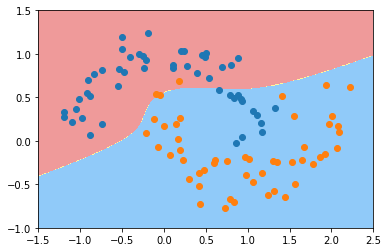

In [31]:
plot_decision_boundary(poly_kernel_svc, axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

## 3. 直观理解高斯核函数

In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
x = np.arange(-4,5,1)
y = np.array((x>=-2) & (x<=2), dtype='int')
print(x)
print(y)

[-4 -3 -2 -1  0  1  2  3  4]
[0 0 1 1 1 1 1 0 0]


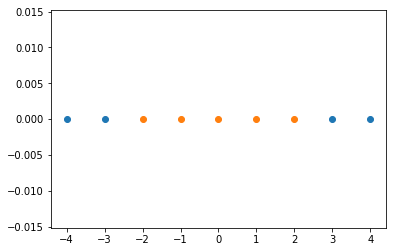

In [35]:
plt.scatter(x[y==0], [0]*len(x[y==0]))
plt.scatter(x[y==1], [0]*len(x[y==1]))
plt.show()

In [45]:
def gaussian(a, l):
    '''l: landmark'''
    gamma = 1.0
    return np.exp(-gamma * (a-l)**2)

In [46]:
landmark = [-1,1]
X_new = np.empty((len(x), len(landmark)))
for index, data in enumerate(x):
    X_new[index, 0] = gaussian(data, landmark[0])
    X_new[index, 1] = gaussian(data, landmark[1])

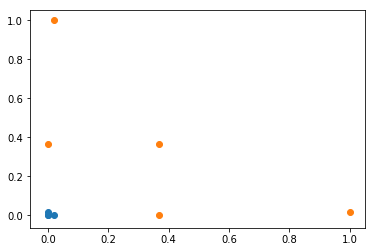

In [47]:
plt.scatter(X_new[y==0,0], X_new[y==0,1])
plt.scatter(X_new[y==1,0], X_new[y==1,1])
plt.show()

- 将一维数据映射到二维数据，此时线性可分
- 上面只有两个landmark,高斯核——对于每一个数据点都是landmark
- m * m的数据映射成为一个m * m的数据，即m维数据

- gamma值越大，高斯分布映射的曲线越陡峭（窄）

### 4. scikit-learn中的RBF核(即高斯核，Radial Basis Function)

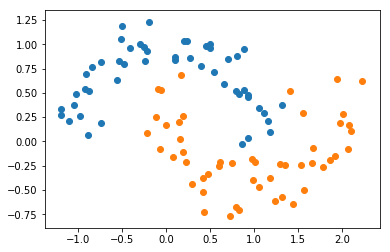

In [48]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
X, y = datasets.make_moons(noise=0.15, random_state=666)

plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

def RBFKernelSVC(gamma=1.0):
    return Pipeline([
        ('std', StandardScaler()),
        ('svc', SVC(kernel='rbf', gamma=gamma))
    ])

In [51]:
svc = RBFKernelSVC(gamma=1.0)
svc.fit(X, y)

Pipeline(memory=None,
     steps=[('std', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

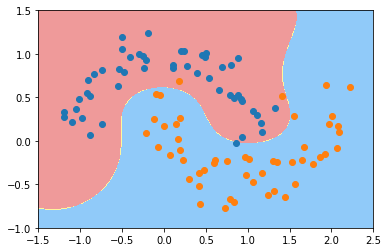

In [52]:
plot_decision_boundary(svc, axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

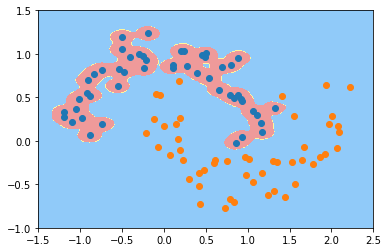

In [53]:
svc_gamma100 = RBFKernelSVC(gamma=100)
svc_gamma100.fit(X, y)
plot_decision_boundary(svc_gamma100, axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

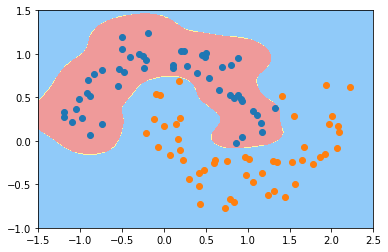

In [54]:
svc_gamma10 = RBFKernelSVC(gamma=10)
svc_gamma10.fit(X, y)
plot_decision_boundary(svc_gamma10, axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

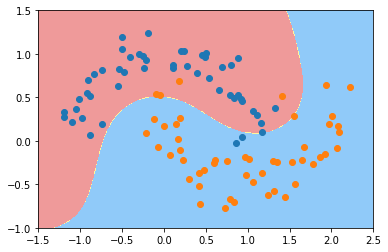

In [55]:
svc_gamma05 = RBFKernelSVC(gamma=0.5)
svc_gamma05.fit(X, y)
plot_decision_boundary(svc_gamma05, axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

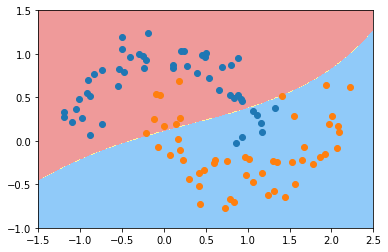

In [56]:
svc_gamma01 = RBFKernelSVC(gamma=0.1)
svc_gamma01.fit(X, y)
plot_decision_boundary(svc_gamma01, axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

- gamma 越大容易过拟合，越小容易欠拟合

### 5. svm解决回归问题

In [58]:
import numpy as np
import matplotlib.pyplot as plt

In [59]:
from sklearn import datasets
boston = datasets.load_boston()
X = boston.data
y = boston.target

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [62]:
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def StandardLinearSVR(epsilon=0.1):
    ''' epsilon : road width / 2'''
    return Pipeline([
        ('std', StandardScaler()),
        ('linearSVR', LinearSVR(epsilon=epsilon))
    ])

In [63]:
svr = StandardLinearSVR()
svr.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('std', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linearSVR', LinearSVR(C=1.0, dual=True, epsilon=0.1, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0))])

In [64]:
svr.score(X_test,y_test) # R-square

0.6356129976430531